In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin

In [3]:
# Load the dataset
df = pd.read_csv("drug_safety.csv")

### Initial Exploration

In [4]:
df.head()

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16103 entries, 0 to 16102
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              16103 non-null  int64  
 1   sex              16103 non-null  object 
 2   trx              16103 non-null  object 
 3   week             16103 non-null  int64  
 4   wbc              9128 non-null   float64
 5   rbc              9127 non-null   float64
 6   adverse_effects  16103 non-null  object 
 7   num_effects      16103 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1006.6+ KB


# Significance level/alpha is 0.05

### Tests for Normality for our variables of interest

<Axes: xlabel='age', ylabel='Count'>

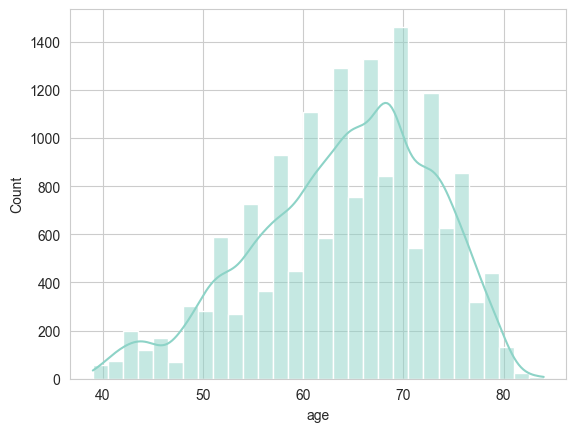

In [7]:
#visualize the distribution of age, set style to whitegrid
sns.set_style("whitegrid")
sns.histplot(df['age'], bins=30, kde=True)

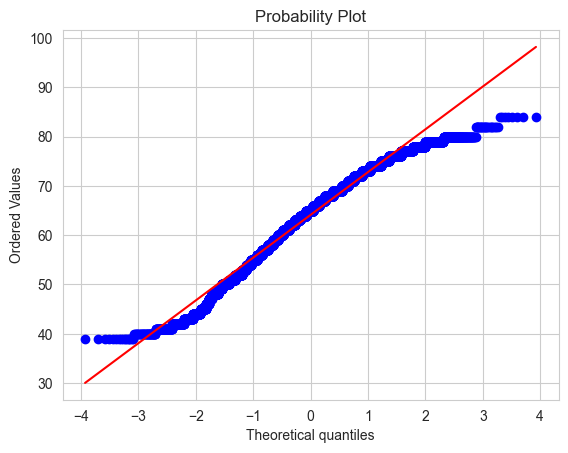

In [10]:
#test for normality using QQ plot
import scipy.stats as stats
stats.probplot(df['age'], dist="norm", plot=plt)
plt.show()

In [11]:
# Shapiro-Wilk test for normality, H0: data is normally distributed, H1: data is not normally distributed
# p-value < 0.05 reject H0
from scipy.stats import shapiro
stat, p = shapiro(df['age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.977, p=0.000


<Axes: xlabel='num_effects', ylabel='Count'>

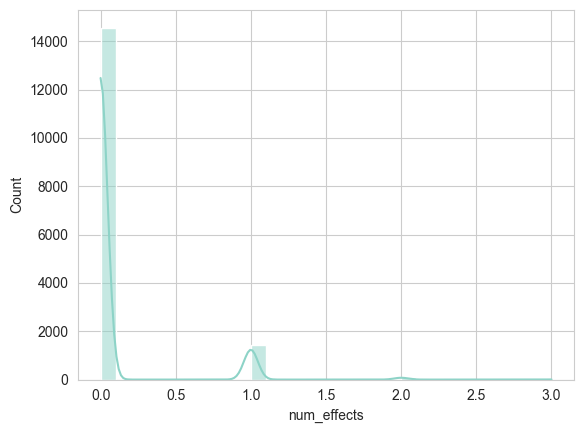

In [12]:
#visualize the distribution of num_effects 
sns.histplot(df['num_effects'], bins=30, kde=True)


In [14]:
# Shapiro-Wilk test for normality, H0: data is normally distributed, H1: data is not normally distributed
# p-value < 0.05 reject H0
stat, p = shapiro(df['num_effects'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.337, p=0.000


Since our data is not normally distributed, we will be using a non-parametric test for the third test.

### Visualisations

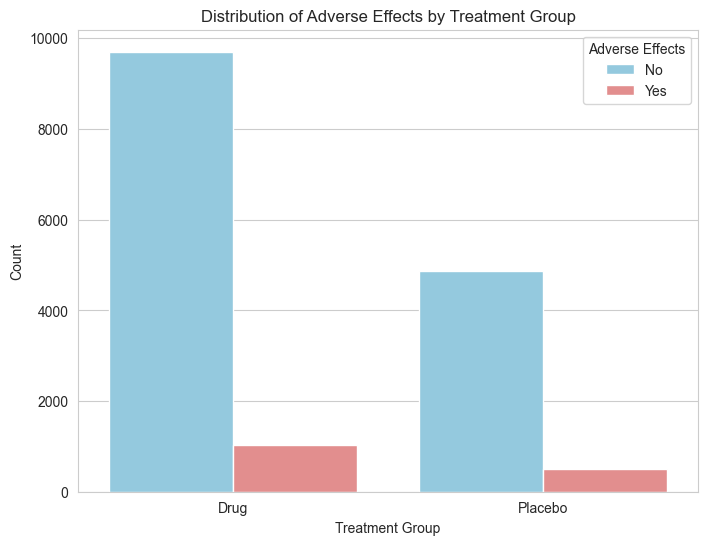

In [15]:
# Create a countplot to visualize the distribution of 'adverse_effects' across 'trx' groups
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='trx', hue='adverse_effects', palette=['skyblue', 'lightcoral'])
plt.title('Distribution of Adverse Effects by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Count')
plt.legend(title='Adverse Effects', labels=['No', 'Yes'])

The distribution of adverse effects appears to be similar between the drug and placebo groups. The counts of individuals with and without adverse effects are roughly proportional between the two groups. 

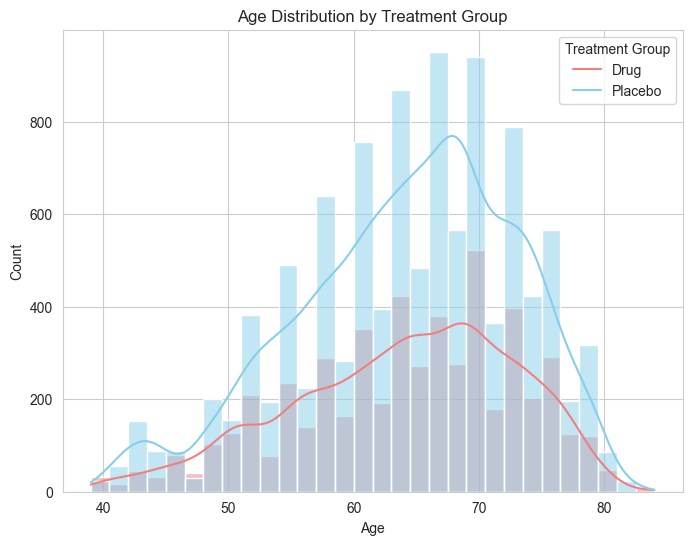

In [21]:
# Create overlaid histograms to visualize the age distribution in the 'Drug' and 'Placebo' groups
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='trx', bins=30, kde=True, palette=['skyblue', 'lightcoral'])
plt.title('Age Distribution by Treatment Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Treatment Group', labels=['Drug', 'Placebo'])

The age distributions for both the drug and placebo groups are relatively similar. Both distributions are slightly right-skewed.

## Testing Hypothesis 1:
Null Hypothesis (H0): The proportion of adverse effects is the same in the Drug group and the Placebo group.
Alternative Hypothesis (Ha): The proportion of adverse effects is different between the Drug group and the Placebo group.

In [44]:
# Perform two proportion z-test for the above hypothesis
from statsmodels.stats.proportion import proportions_ztest

# Filter data into 'Drug' and 'Placebo' groups
drug_group = df[df['trx'] == 'Drug']
placebo_group = df[df['trx'] == 'Placebo']

# Count the number of adverse effects in each group
successes = [drug_group['adverse_effects'].sum(), placebo_group['adverse_effects'].sum()]
samples = [len(drug_group), len(placebo_group)]

# Perform the two-proportion z-test
z_stat, two_sample_p_value = proportions_ztest(successes, samples)

print("\nTwo-Proportion Z-test Results:")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {two_sample_p_value:.4f}")


Two-Proportion Z-test Results:
Z-statistic: 0.0452
P-value: 0.9639


There is not enough evidence to support the claim that the proportion of adverse effects is different between the Drug group and the Placebo group.

## Testing Hypothesis 2
Null Hypothesis (H0): The number of adverse effects is independent of the treatment group (Drug or Placebo).
Alternative Hypothesis (Ha): The number of adverse effects is dependent on the treatment group.

In [43]:
from scipy.stats import chi2_contingency, mannwhitneyu

# Create a contingency table for adverse effects vs. treatment group
contingency_table = pd.crosstab(df['trx'], df['adverse_effects'])

# Perform the chi-squared test
chi2, p_proportion, dof, expected = chi2_contingency(contingency_table)

# Save the p-value for the proportion of adverse effects
num_effects_p_value = p_proportion

# Print the p-value
print("\nChi-Squared Test Results:", num_effects_p_value)



Chi-Squared Test Results: 0.9866161797847002


 There is not enough evidence to support the claim that the occurrence of adverse effects is dependent on the treatment group.

## Testing Hypothesis 3
Null Hypothesis (H0): There is no difference in the average age between the Drug group and the Placebo group.
Alternative Hypothesis (Ha): There is a difference in the average age between the Drug group and the Placebo group.

In [41]:
# Perform the Mann-Whitney U test
u_stat, age_group_effects_p_value = mannwhitneyu(drug_group['num_effects'], placebo_group['num_effects'])

#print the p-value
print("\nMann-Whitney U Test Results:", age_group_effects_p_value)



Mann-Whitney U Test Results: 0.9407321628349204


There is not enough evidence to support the claim that there is a difference in the age distributions between the Drug group and the Placebo group.